In [2]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

import NaiveDE
import SpatialDE

Populating the interactive namespace from numpy and matplotlib


In [3]:
counts = pd.read_csv('Data/Brain2_treated_dt_tissue.tsv', sep='\t',index_col=0)
counts = counts.T[counts.sum(0) >= 3].T  # Filter practically unobserved genes
print(counts.shape)
counts.iloc[:5, :5]

(11, 4560)


,ENSMUSG00000033813,ENSMUSG00000033793,ENSMUSG00000025907,ENSMUSG00000051285,ENSMUSG00000025917
26.02x13.95,0.0,0.0,0.0,1.0,2.0
26.02x14.93,1.0,0.0,2.0,0.0,1.0
27.03x13.95,1.0,0.0,0.0,0.0,0.0
27.01x14.88,0.0,0.0,0.0,1.0,1.0
28.07x12.93,0.0,0.0,0.0,0.0,2.0


In [4]:
sample_info = pd.DataFrame(0, index = counts.index, columns = ['x','y','total_counts'])
sample_info.loc[:,'x'] = [float(item.split('x')[0]) for item in sample_info.index]
sample_info.loc[:,'y'] = [float(item.split('x')[1]) for item in sample_info.index]
sample_info.loc[:,'total_counts'] = counts.sum(axis=1)
sample_info.head(5)

,x,y,total_counts
26.02x13.95,26.02,13.95,4025.0
26.02x14.93,26.02,14.93,5315.0
27.03x13.95,27.03,13.95,1672.0
27.01x14.88,27.01,14.88,4413.0
28.07x12.93,28.07,12.93,4702.0


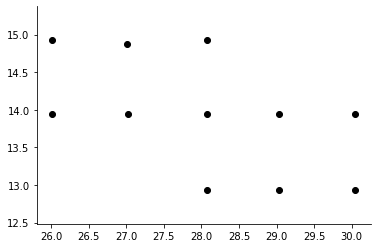

In [5]:
figsize(6, 4)
plt.scatter(sample_info['x'], sample_info['y'], c='k');
plt.axis('equal');

In [6]:
norm_expr = NaiveDE.stabilize(counts.T).T
resid_expr = NaiveDE.regress_out(sample_info, norm_expr.T, 'np.log(total_counts)').T

In [7]:
sample_resid_expr = resid_expr.sample(n=len(counts.columns), axis=1, random_state=1)

X = sample_info[['x', 'y']]
sample_resid_expr.head()
results = SpatialDE.run(X, sample_resid_expr)

In [8]:
results.head().T

,0,1,2,3,4
FSV,2.00502e-09,2.00502e-09,2.00502e-09,2.00502e-09,2.00502e-09
M,4,4,4,4,4
g,ENSMUSG00000032186,ENSMUSG00000033751,ENSMUSG00000022263,ENSMUSG00000100862,ENSMUSG00000068014
l,0.465108,0.465108,0.465108,0.465108,0.465108
max_delta,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08,4.85165e+08
max_ll,4.05086,13.6042,10.3813,7.90267,11.4679
max_mu_hat,1.03809,1.77089,3.0896,0.518211,1.72561
max_s2_t_hat,2.27896e-09,6.47407e-09,1.96933e-08,5.82191e-10,6.15257e-09
model,SE,SE,SE,SE,SE
n,11,11,11,11,11


In [9]:
results.sort_values('qval').head(5)[['g', 'l', 'pval','qval']]

,g,l,pval,qval
0,ENSMUSG00000032186,0.465108,0.876362,0.0
3031,ENSMUSG00000117924,0.465108,0.876362,0.0
3032,ENSMUSG00000000290,0.465108,0.876362,0.0
3033,ENSMUSG00000022892,0.465108,0.876362,0.0
3034,ENSMUSG00000025978,0.465108,0.876362,0.0


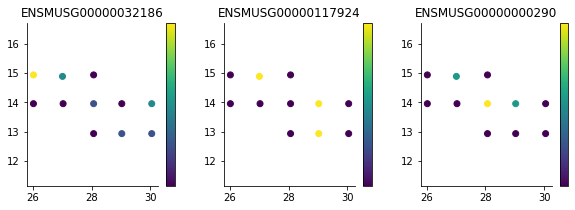

In [11]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000032186', 'ENSMUSG00000117924', 'ENSMUSG00000000290']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

In [12]:
results.sort_values('qval').tail(10)[['g', 'l', 'qval']]

,g,l,qval
1513,ENSMUSG00000012405,0.465108,0.0
1522,ENSMUSG00000001158,0.465108,0.0
1520,ENSMUSG00000004980,0.465108,0.0
1519,ENSMUSG00000024248,0.465108,0.0
1518,ENSMUSG00000056486,0.465108,0.0
1517,ENSMUSG00000047139,0.465108,0.0
1516,ENSMUSG00000021701,0.465108,0.0
1515,__ambiguous[ENSMUSG00000042289+ENSMUSG00000108...,0.465108,0.0
1521,ENSMUSG00000074781,0.465108,0.0
4559,ENSMUSG00000033208,3.351823,0.0


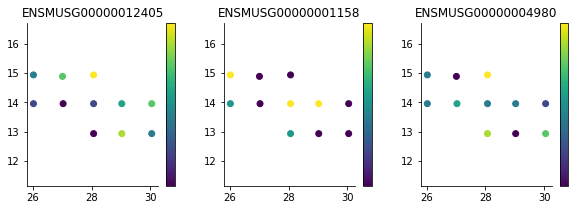

In [13]:
figsize(10, 3)
for i, g in enumerate(['ENSMUSG00000012405', 'ENSMUSG00000001158', 'ENSMUSG00000004980']):
    plt.subplot(1, 3, i + 1)
    plt.scatter(sample_info['x'], sample_info['y'], c=norm_expr[g]);
    plt.title(g)
    plt.axis('equal')


    plt.colorbar(ticks=[]);

C:\Users\uqjxu8\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  after removing the cwd from sys.path.


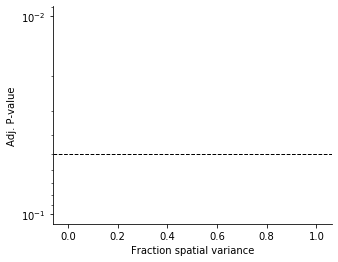

In [14]:
figsize(5, 4)
plt.yscale('log')

plt.scatter(results['FSV'], results['qval'], c='black')

plt.axhline(0.05, c='black', lw=1, ls='--');

plt.gca().invert_yaxis();
plt.xlabel('Fraction spatial variance')
plt.ylabel('Adj. P-value');